## Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
%matplotlib inline

## Load data

In [2]:
# Load data
df = pd.read_csv('ABBV-AbbVie.csv')

## Data preprocessing

In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-01,79.769997,80.849998,79.279999,80.099998,62.999916,8567900
2019-03-04,80.400002,80.730003,79.110001,79.459999,62.496544,5872500
2019-03-05,79.379997,79.900002,78.720001,78.910004,62.063961,5933100
2019-03-06,79.129997,79.129997,77.559998,78.089996,61.419022,5293200
2019-03-07,77.769997,79.120003,77.440002,78.239998,61.537010,6642500
...,...,...,...,...,...,...
2024-05-24,158.360001,158.779999,156.360001,157.059998,157.059998,3689900
2024-05-28,156.350006,156.350006,153.949997,155.339996,155.339996,5533500
2024-05-29,154.889999,156.380005,153.679993,154.789993,154.789993,4254500


## Scale Data

In [4]:
# Select 'Close' column
data = df['Close'].values

In [5]:
# Scale data
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(data.reshape(-1, 1))

## Split the data into train and test

In [6]:
# Define the size of train and test
train_size = int(len(data_scaled) * 0.8)
test_size = len(data_scaled) - train_size

# Split the data into train and test set
train_data = data_scaled[0 : train_size, :]
test_data = data_scaled[train_size : len(data_scaled), :]

## Create and add data into X, y

In [7]:
def add_data(data, sequence_length=1):
    X, Y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i : (i + sequence_length), 0])
        Y.append(data[i + sequence_length, 0])
    return np.array(X), np.array(Y)

In [8]:
# Reshape into X=t,t+1,t+2..t+60 and Y=t+60
sequence_length = 60

# Get last data for test
train_last_windowsize = train_data[-sequence_length:]

test_data_extended = np.concatenate((train_last_windowsize, test_data), axis=0)

X_train, y_train = add_data(train_data, sequence_length)
X_test, y_test = add_data(test_data_extended, sequence_length)

# Reshape inputs to [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

## Build Model

In [9]:
model = Sequential() # Encapsulate the sequence of the inner layers

# 4 LSTM layers
model.add(LSTM(units = 50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# 1 Dense layer
model.add(Dense(units=1)) 

# Optimizer
model.compile(optimizer = 'adam', loss='mean_squared_error')

D:\Anaconda\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


## Training Model

In [10]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
32/32 - 8s - 261ms/step - loss: 0.0318
Epoch 2/50
32/32 - 2s - 51ms/step - loss: 0.0056
Epoch 3/50
32/32 - 2s - 53ms/step - loss: 0.0054
Epoch 4/50
32/32 - 2s - 69ms/step - loss: 0.0049
Epoch 5/50
32/32 - 3s - 84ms/step - loss: 0.0045
Epoch 6/50
32/32 - 3s - 87ms/step - loss: 0.0043
Epoch 7/50
32/32 - 3s - 88ms/step - loss: 0.0042
Epoch 8/50
32/32 - 3s - 82ms/step - loss: 0.0050
Epoch 9/50
32/32 - 3s - 83ms/step - loss: 0.0051
Epoch 10/50
32/32 - 3s - 81ms/step - loss: 0.0040
Epoch 11/50
32/32 - 3s - 92ms/step - loss: 0.0038
Epoch 12/50
32/32 - 3s - 98ms/step - loss: 0.0039
Epoch 13/50
32/32 - 3s - 103ms/step - loss: 0.0052
Epoch 14/50
32/32 - 3s - 106ms/step - loss: 0.0040
Epoch 15/50
32/32 - 3s - 101ms/step - loss: 0.0038
Epoch 16/50
32/32 - 4s - 124ms/step - loss: 0.0034
Epoch 17/50
32/32 - 4s - 119ms/step - loss: 0.0037
Epoch 18/50
32/32 - 4s - 114ms/step - loss: 0.0034
Epoch 19/50
32/32 - 4s - 111ms/step - loss: 0.0030
Epoch 20/50
32/32 - 7s - 221ms/step - loss: 0.0031


## Predict and Inverse Transform the Predictions

In [11]:
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))
train_data = scaler.inverse_transform(train_data)
test_data = scaler.inverse_transform(test_data)

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 387ms/step


## Calculate the error of the model

In [12]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error, mean_absolute_error
# Evaluate the accuracy of test

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test, y_pred)
test_msle = mean_squared_log_error(y_test, y_pred)


print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)
print(f"MAE on Test dataset: ", test_mae)

MAPE on Test dataset:  0.021954700114055602
RMSE on Test dataset:  4.072096341658712
MSLE on Test dataset:  0.0006887365305988458
MAE on Test dataset:  3.3768104022589918


## Predict Close price for 90 next days

In [13]:
# Select the last day of current index
last_date = df.index[-1]

# Add a new day after the last day
next_date = last_date + pd.DateOffset(days=1)

# Generate a list of index only starting from the next day in 90 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

# Predict Close price for 90 next days
last_sequence_days = data_scaled[-sequence_length:].reshape(1, -1, 1)

y_next_90_days = []

for i in range(90):
    # Predict Close price for next day
    next_day_pred = model.predict(last_sequence_days)
    
    # Save the predict value
    y_next_90_days.append(next_day_pred[0][0])
    
    # Update information of the next day
    last_sequence_days = np.concatenate([last_sequence_days[:, 1:, :], next_day_pred.reshape(1, 1, 1)], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 4

In [14]:
# Show the result of predict 90 next days 
y_next_90_days = scaler.inverse_transform(np.array(y_next_90_days).reshape(-1, 1))
print(y_next_90_days.flatten())

[158.42769 157.67863 157.33694 157.31258 157.4898  157.76787 158.07747
 158.38069 158.66241 158.92041 159.15768 159.37753 159.5818  159.77065
 159.94322 160.09859 160.23602 160.35548 160.45778 160.5441  160.6162
 160.67584 160.72491 160.76538 160.79887 160.8271  160.85146 160.87312
 160.89316 160.9124  160.93164 160.95128 160.97176 160.99338 161.01624
 161.04036 161.06581 161.09236 161.11987 161.14818 161.1771  161.20638
 161.23584 161.26529 161.29456 161.32343 161.35179 161.3795  161.40645
 161.43257 161.45784 161.48216 161.5056  161.5281  161.5497  161.57042
 161.59026 161.60931 161.62755 161.64503 161.66182 161.67793 161.69347
 161.70844 161.72287 161.73682 161.7503  161.76334 161.77597 161.78824
 161.80014 161.8117  161.8229  161.83383 161.8444  161.85472 161.86476
 161.87448 161.88396 161.89316 161.9021  161.91075 161.91917 161.92735
 161.93529 161.94301 161.95044 161.9577  161.9647  161.97148]


## Model visualization

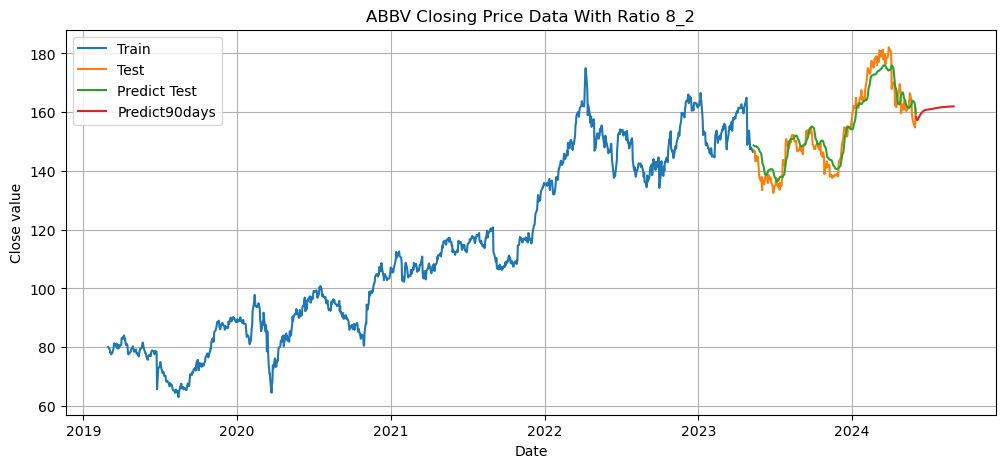

In [15]:
plt.figure(figsize=(12, 5))

# Train set
plt.plot(df[:train_size].index, train_data)

# Test set
plt.plot(df[train_size:].index, test_data)

# Predict in test set
plt.plot(df[train_size:].index, y_pred)

# Predict 90 next days
plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'Predict Test', 'Predict90days'])
plt.grid()
plt.title("ABBV Closing Price Data With Ratio 8_2")
plt.xlabel("Date")
plt.ylabel("Close value")
plt.savefig('Image/RNN_82_90days_ABBV.png')
plt.show()